"Sales Forecasting & Warehouse Optimization for Walmart: Enhancing Retail Efficiency



StakeHolder:Principal sales officer

## Abstract

This project focuses on sales forecasting and warehouse management optimization for 45 Walmart stores over a three-year period. The dataset includes variables such as store ID, department, sales, CPI, fuel prices, holidays, temperature, store size, and type, enabling comprehensive analysis. The objective is to predict future sales trends and derive actionable insights to enhance warehouse operations.

Various predictive models were employed, including Random Forest, XGBoost, an ensemble of Random Forest and XGBoost, ARIMA, and TimeGPT (a transformer-based model), to forecast sales for the next six months. The project introduces Sales Velocity as a key performance indicator (KPI) to measure inventory movement efficiency.

To support decision-making, a multi-level dashboard was developed. This dashboard provides detailed analytics on overall, store-wise, and department-wise sales. It also visualizes key KPIs such as Sales Velocity, top 10 performing stores and departments, and the best-performing months. These insights enable Walmart to align inventory and warehouse management strategies with forecasted demand, enhancing operational efficiency and customer satisfaction.

This comprehensive approach demonstrates the potential of integrating predictive analytics and visualization tools for effective retail management and decision-making.

## Data Summary

- This is historical sales data for 45 stores loacated in different regions, each store contains a number of dapartments.

- Intially data is in three different files named Stores, Features, Sales.

**Stores Data**

- Store: Unique identifier for each store.

- Type: Category or type of the store.

- Size: Physical size of the store in square feet.

**Features Data**

- Store: Unique identifier for each store.

- Date: Weekly timestamp (YYYY-MM-DD).

- Temperature: Average temperature in the region (°F).

- Fuel_Price: Regional fuel price (USD per gallon).

- MarkDown1-5: Anonymized promotional markdown data; available after Nov 2011. Missing values are marked as NA.

- CPI: Consumer Price Index, representing average price levels for goods and services.

- Unemployment: Regional unemployment rate (percentage).

- IsHoliday: Indicates if the week includes a special holiday (True/False).


**Sales Data**

- Store: Unique identifier for each store.

- Dept: Unique identifier for each department.

- Date: Weekly timestamp of sales data (YYYY-MM-DD).

- Weekly_Sales: Revenue generated by a department within a store in a specific week (USD).

- IsHoliday: Indicates if the week includes a special holiday (True/False).


[Source](https://https://github.com/Ernest-30/Walmart-Retail-sales-Analysis/tree/main)



## Research Questions


**1. Impact of Holidays on Sales Performance**

- How do weekly sales trends differ between holiday and non-holiday weeks across stores and departments?

**2. Economic Indicators and Sales Correlation**

- What is the relationship between economic factors (fuel price, CPI, and unemployment rate) and weekly sales?

**3. Sales Velocity as a KPI for Warehouse Management**

 - How does sales velocity vary across stores, departments, and time periods, and what insights can it provide for warehouse stock optimization?




 ## Methodology

 1. **Data Acquisition** : This data was gathered from the github repository, which has three distinct files with the names Stores, Features, and Sales.

 2. **Data Wrangling** : The central or main dataset, which consisted of 17 columns and 421,570 rows with "weekly_sales" as the response variable, was created through merging the data from three sources.

 3. **Data Cleaning** : Dealt with finding and eliminating irregularities in the quality of the data.

  - There are no null values in the dataset other than in the markdown columns; we examined those variables and determined they were not relevant to our use case, so we removed them.

4. **Exploratory Data Analysis** : The attributes of each column are thoroughly examined by graphically and statisticaly to comprehend its characteristics and also to answer the research quations.

5. **Feature Engineering**: This stage is carried out repeatedly during the project since each predictive mpdel and operation for a different hierarchy required a new dataset structure, so the dataset is modeled appropriately. Among the significant changes are:

  - Retrieved holidays for the needed dates from a Nixtala library and combined them with the main dataset.
  - Investigated and computed "Sales velocity," a KPI derived from sales data that is used to gauge how quickly sales are occurring and to decide whether to refill in warehouses.

6. **Predective Models**: A bunch of predictive models were used to predict sales over the following six months, including TimeGPT (a transformer-based model), ARIMA, Random Forest, XGBoost, and an ensemble of Random Forest and XGBoost.

  The model's performance was assessed using Symmentric Mean Absolute Percentage Error(SMAPE) and Mean Absolute Error (MAE) as metrics.


7. **Select Models** : After considering all the Matrics TimeGPT has best SMAPE score than other models and is showing better results on the Plots, Thus selected this model for the Dashboard.

8. **Developing and Deploying Dashboard**: A dashboard with multiple levels was created. This dashboard offers comprehensive data on sales by department, shop, and overall. Additionally, it displays important KPIs like sales velocity, the top ten departments and locations, and the months with the highest performance. Walmart is able to improve operational efficiency and customer satisfaction by using these insights to match warehouse management and inventory strategies with anticipated demand.

  This Dashboard is built on Streamlit and deployed on HuggingFace Spaces.





## Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# URLs for the Excel files
stores_url = 'https://raw.githubusercontent.com/RatnaAnvesh/Capstone/refs/heads/main/stores%20data-set.csv'
features_url = 'https://raw.githubusercontent.com/RatnaAnvesh/Capstone/refs/heads/main/Features%20data%20set.csv'
sales_url = 'https://raw.githubusercontent.com/RatnaAnvesh/Capstone/refs/heads/main/sales%20data-set.csv'

In [ ]:
# Load the datasets from GitHub
stores_df = pd.read_csv(stores_url)
features_df = pd.read_csv(features_url)
sales_df = pd.read_csv(sales_url)

In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
# Merge the Sales and Features datasets on 'Store' and 'Date'
combined_df = pd.merge(sales_df, features_df, on=['Store', 'Date'], how='left')

# Now, merge the result with the Stores dataset on 'Store'
combined_df = pd.merge(combined_df, stores_df, on='Store', how='left')

# Check the combined dataframe
combined_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
combined_df.shape

(421570, 17)

In [ ]:
aggregated_df = combined_df.copy() # use this datafrane for randomforest, xgboost

In [ ]:
df_ariima = combined_df.copy()  # use this datafrane for arima.

## Data Cleaning


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [ ]:
combined_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


- Only Markdown features are having nulls in them as they contain values only after certain dates mentioned in data catalog.


In [ ]:
# Assuming markdown as catagorical feature
# Check by value counts
combined_df['MarkDown1'].value_counts()

,count
MarkDown1,
460.73,102
1.50,102
175.64,93
1483.17,75
686.24,75
...,...
196.40,42
318.51,42
945.96,42


- If markdowns are catagorical variables they should have maximum of 10 catagiries, but we have more than 1000 rows unique which does not show the catagrical features.

- So we conclude that markdown features are not catagorical, and from the data catalog as it was mentioned as "anonymized data related to promotional markdowns" which was not clear.

In [ ]:
# Convert to date_time formate
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format = '%d/%m/%Y')

In [ ]:
min(combined_df['Date']), max(combined_df['Date'])

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

- so we have weekly data from January 2010 to Octomber 2012.

## Exploratory Data Analysis

In [ ]:
# Statistical summary
combined_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,150681.0,7246.420196,0.27,2240.27,5347.45,9210.9,88646.76,8291.221345
MarkDown2,111248.0,3334.628621,-265.76,41.6,192.0,1926.94,104519.54,9475.357325
MarkDown3,137091.0,1439.421384,-29.1,5.08,24.6,103.99,141630.61,9623.07829
MarkDown4,134967.0,3383.168256,0.22,504.22,1481.31,3595.04,67474.85,6292.384031


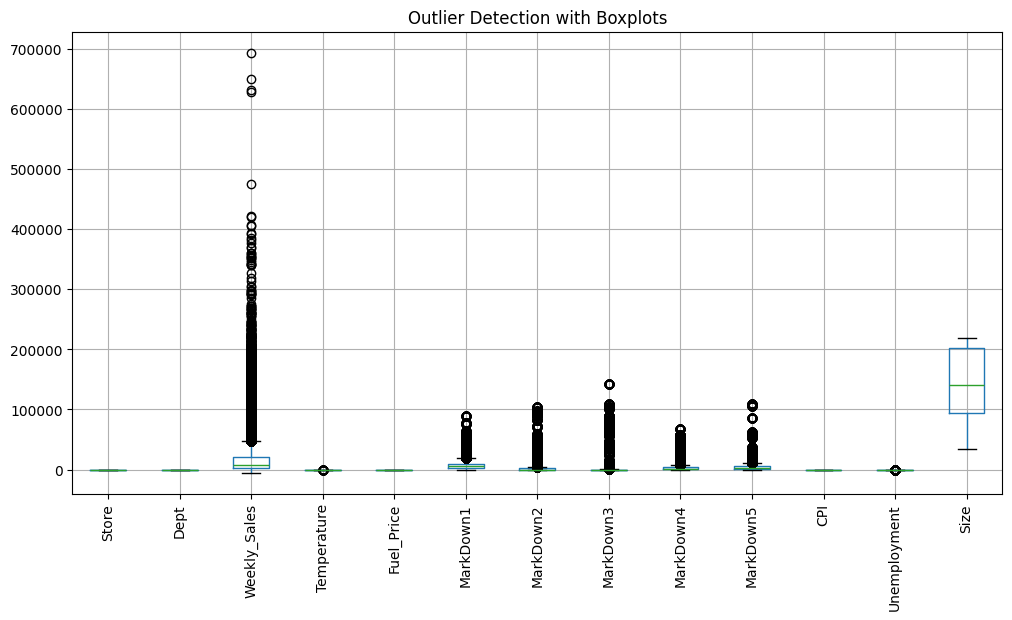

In [ ]:
# Boxplots for numerical columns
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
combined_df[numeric_columns].boxplot(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Outlier Detection with Boxplots')
plt.show()


- The boxplot shows many outliers in "Weekly_Sales" and markdowns, indicating high variability, while other variables have smaller spreads. "Size" has a wider range but no extreme outliers.

- The outliers are not droped as they are time bounded, if we drop them are treat them by normalizing we may miss the temporal nature of the data and model could not recognise certain patterns.

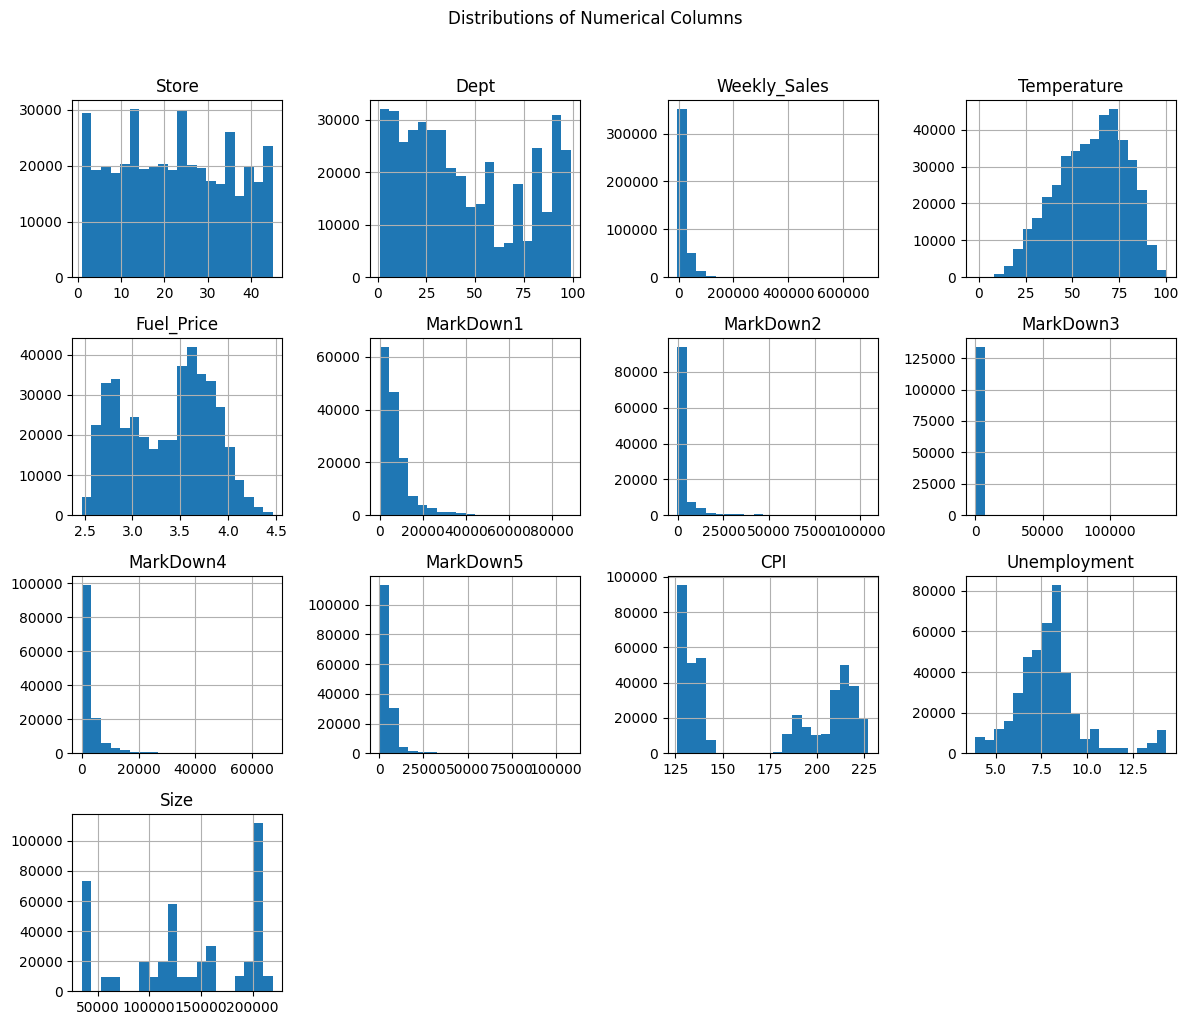

In [ ]:
# Histograms for numerical columns
combined_df[numeric_columns].hist(bins=20, figsize=(12, 10), layout=(4, 4))
plt.suptitle('Distributions of Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()


The histograms show that "Weekly_Sales" and markdowns are highly skewed, while "Temperature," "Fuel_Price," and "Unemployment" have more even spreads and "Size" shows distinct peaks.

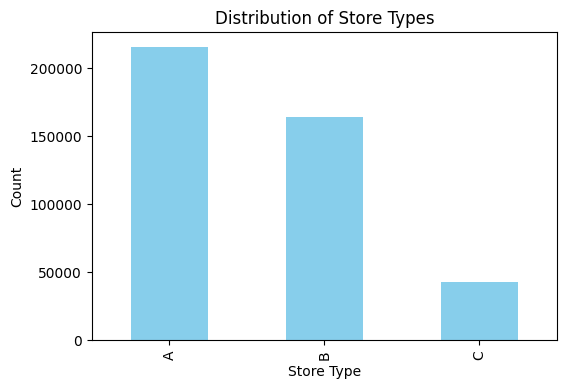

In [ ]:
# Bar plot for store types
combined_df['Type'].value_counts().plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()


- From this graph we can say that the stores are catagorised in 3 types.

- Chart shows that Store Type A is the most common, followed by Type B, while Type C has the lowest count. This indicates Store Type A are more in number in our dataset.

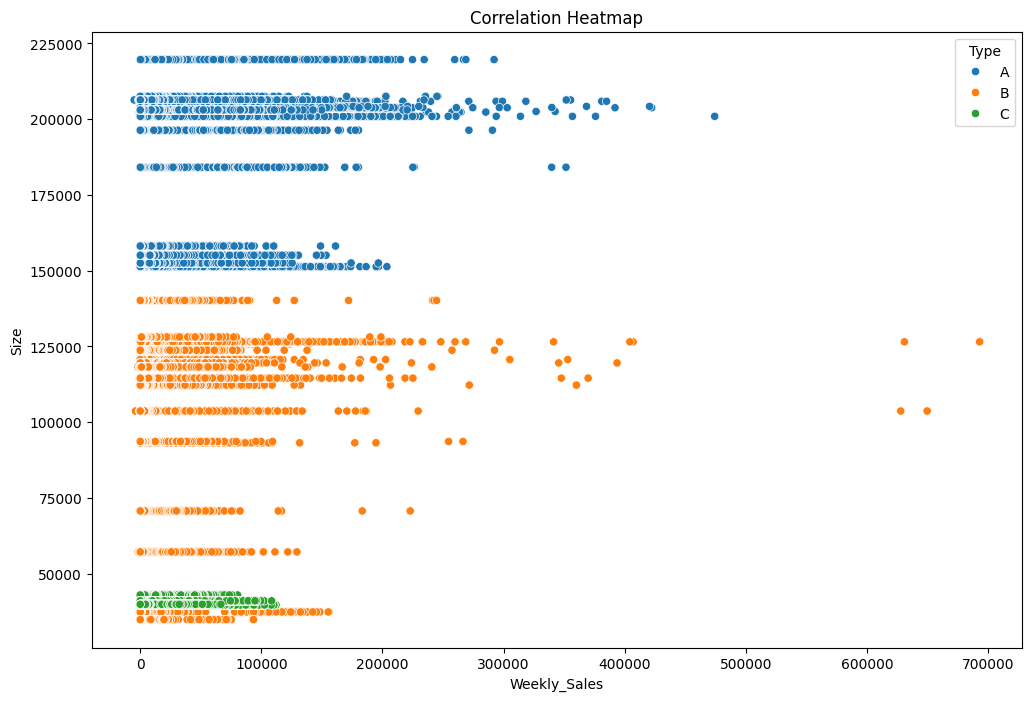

In [ ]:
# Scatter plot for size by sales across store types.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_df, y='Size', x='Weekly_Sales', hue = 'Type')
plt.title('Correlation Heatmap')
plt.show()


- From the plot we can see there are clusters formed indicating 3 types of stores depending on size feature :
  - Larger stores (Type A) are called as **Walmart Supercenters**, which has everything and offer a one-stop shopping experience.Are around 182,000 square feet.

  - Mid range stores (Type B) are called as **Walmart Discount Stores**, which offers electronics, apparel, toys, home furnishings, health and beauty aids, hardware.In about 106,000 square feet

  - Smaller stores (Type C) are called as **Walmart Neighborhood Market**,
   offers fresh produce, meat and dairy products, bakery and deli items, household supplies, health and beauty aids and a pharmacy. Each one is approximately 38,000 square feet.



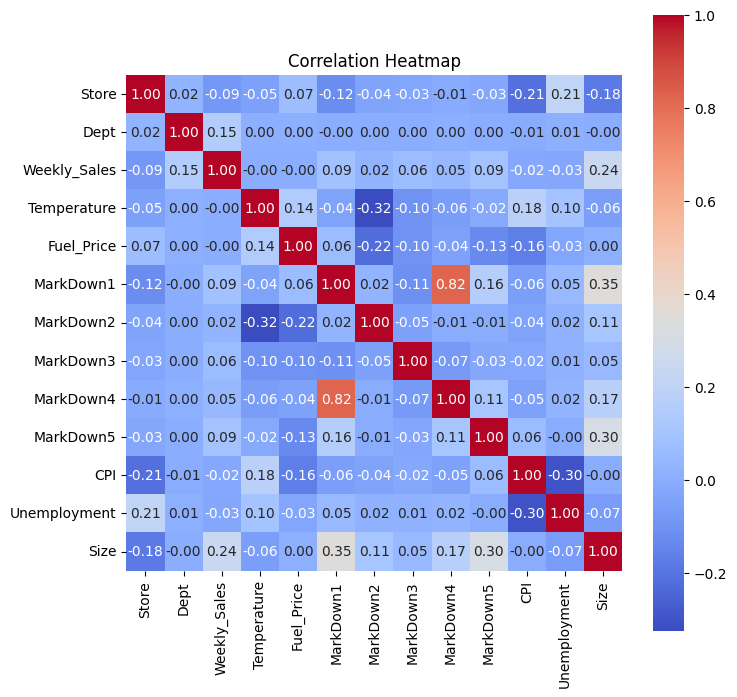

In [ ]:
# Correlation matrix
corr_matrix = combined_df[numeric_columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()


- Unemployment and CPI shows negative correlation with weekly sales which indicates as unemployment rate or CPI increase (inflation) there will low sales.

- Size and weekly sales are positively correlated.which is true as supercenters will have more sales than neighborhood markests.

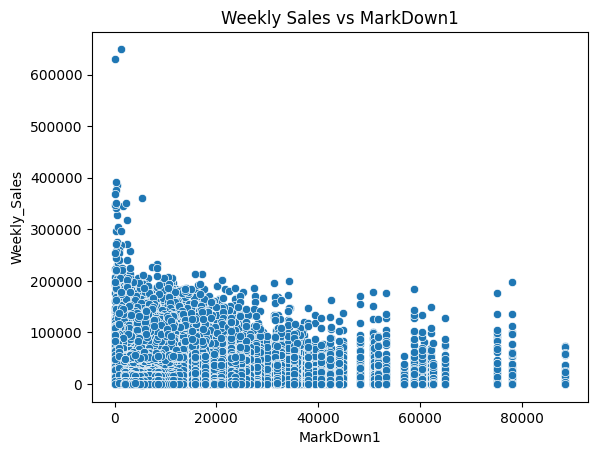

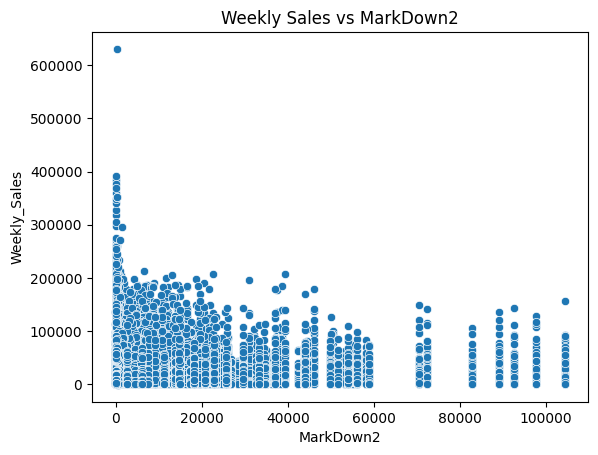

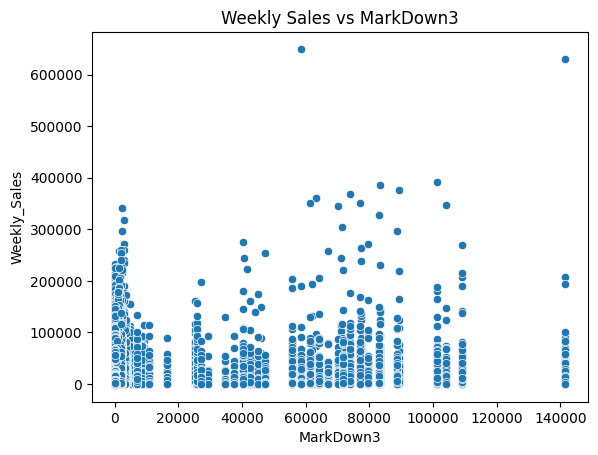

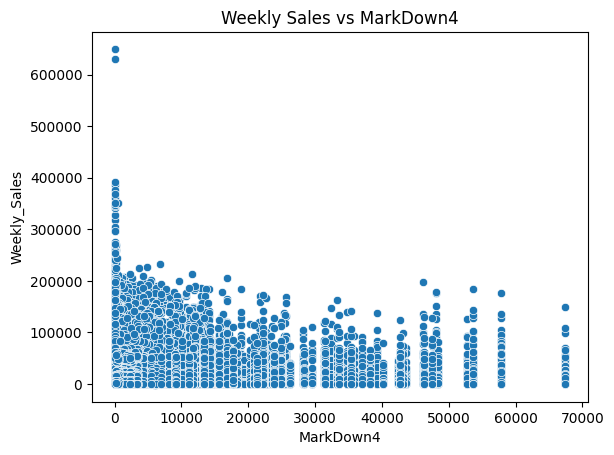

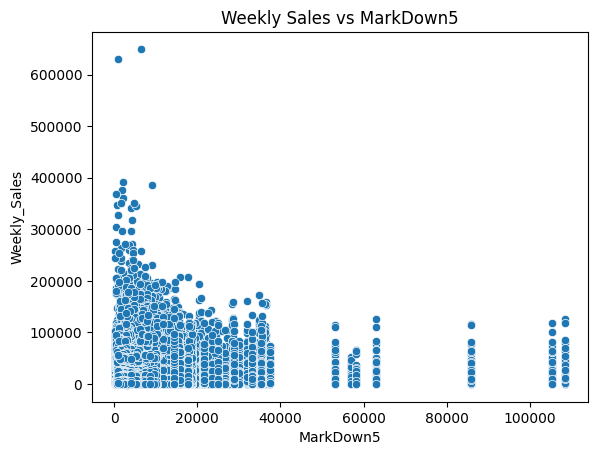

In [ ]:
# Weekly Sales vs Markdown columns
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for col in markdown_columns:
    sns.scatterplot(data=combined_df, x=col, y='Weekly_Sales')
    plt.title(f'Weekly Sales vs {col}')
    plt.show()


We can see that there is no clear trend between all Markdown columns and weekly sales.

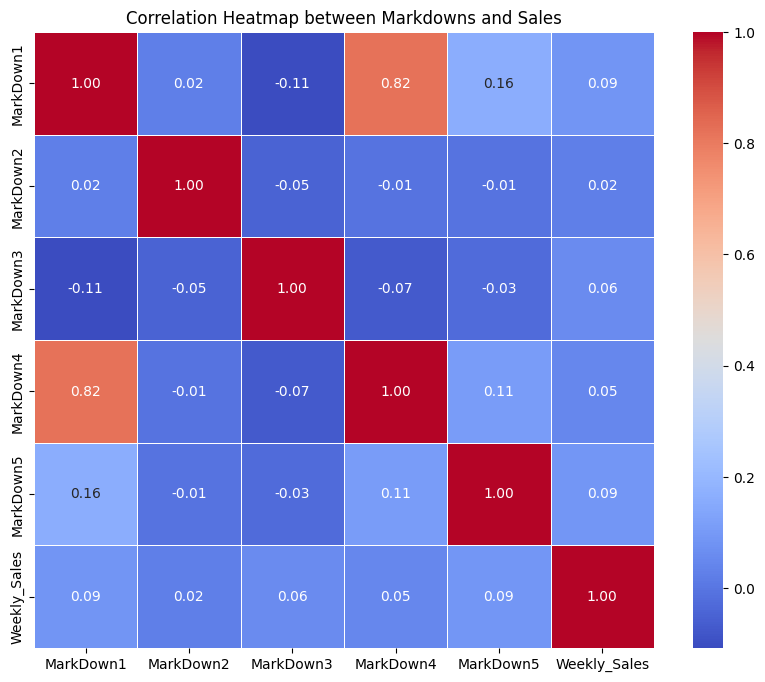

In [ ]:
# Calculate correlations between markdown columns and sales
correlation_matrix = combined_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Heatmap between Markdowns and Sales')

# Display the plot
plt.show()

The low correlation values indicate that markdowns, as represented by these columns, may not have a strong linear relationship with sales in the dataset. This could suggest several things:

The markdowns may not be the primary driver of sales for the departments/stores we are analyzing.

The markdowns could be applied at different times, which may not align with when demand spikes (e.g., markdowns might not always coincide with holidays or other promotional events).

External factors like holidays, promotions, and other features (e.g., temperature, fuel prices) could be more important drivers of sales.

In [ ]:
import plotly.express as px

#monthly_sales = combined_df.groupby(pd.Grouper(key = 'Date', freq = 'M'))['Weekly_Sales'].mean().round(2)
monthly_sales =  combined_df.groupby('Date')['Weekly_Sales'].mean().round(2)
#monthly_sales = monthly_sales.astype('int64')

# Create the line plot using Plotly Express
fig = px.line(x = list(monthly_sales.index.to_list()),
              y = list(monthly_sales.values),
              title = 'Avg Sales by Month')

# Update axis labels
fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title_text = 'Avg Sales in $')

# Update trace settings
fig.update_traces(mode = 'markers+lines')

# Show the plot
fig.show()

The line graph shows weekly sales over time, with steady sales between 40 million dollars and 50 million dollars, except for two sharp spikes during the holiday seasons in late 2010 and late 2011.

The graph shows monthly fluctuations in total sales, with sharp peaks around early 2011 and early 2012, while other months have lower and varying sales.



Obvious that sales are high during November, December, as it is has prime holiday as Black Friday, Thanks Giving, Chritmas and New Year and they have large discounts going on.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group the data by month and calculate the average fuel price per month
monthly_fuel = combined_df.groupby(pd.Grouper(key='Date', freq='M'))['Fuel_Price'].mean().round(2)

# Create a subplot figure with shared x-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Weekly Sales trace to the subplot
fig.add_trace(
    go.Scatter(x=monthly_sales.index, y=monthly_sales.values, name="Weekly Sales"),
    secondary_y=False,
)

# Add Monthly Fuel Price trace to the subplot
fig.add_trace(
    go.Scatter(x=monthly_fuel.index, y=monthly_fuel.values, name="Monthly Fuel Price"),
    secondary_y=True,
)

# Update layout for better visualization
fig.update_layout(
    title_text=" Sales and Fuel Price Over Time",
    xaxis_title="Date",
)

# Update y-axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Fuel Price", secondary_y=True)

# Show the plot
fig.show()

<ipython-input-25-4b902a2eecd4>:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



The line graph shows the monthly average fuel prices over time. Fuel prices exhibit fluctuations, with noticeable peaks around mid-2011 and mid-2012 and troughs in early 2010 and late 2011 which may effect the sales directly or indirectly by giving more chances to travel and shop more.

In [ ]:
avg_cpi = combined_df.groupby('Date')['CPI'].mean().round(2)

# Create a subplot figure with shared x-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Weekly Sales trace to the subplot
fig.add_trace(
    go.Scatter(x=monthly_sales.index, y=monthly_sales.values, name="Weekly Sales"),
    secondary_y=False,
)

# Add Monthly Fuel Price trace to the subplot
fig.add_trace(
    go.Scatter(x=avg_cpi.index, y=avg_cpi.values, name="Avg CPI rate"),
    secondary_y=True,
)

# Update layout for better visualization
fig.update_layout(
    title_text=" Sales and CPI Rate Over Time",
    xaxis_title="Date",
)

# Update y-axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="CPI Rates", secondary_y=True)

# Show the plot
fig.show()

- CPI is always rising, and from previous correlation heatmap insights show that there is no strong relationship. However, the negative sign suggests that if CPI rates rise, we might anticipate a slight decline in sales, which is not very likely given the poor correlation.

In [ ]:
# Unemloyment rates
avg_unemp = combined_df.groupby('Date')['Unemployment'].mean().round(2)

# Create a subplot figure with shared x-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Weekly Sales trace to the subplot
fig.add_trace(
    go.Scatter(x=monthly_sales.index, y=monthly_sales.values, name="Weekly Sales"),
    secondary_y=False,
)

# Add Monthly Fuel Price trace to the subplot
fig.add_trace(
    go.Scatter(x=avg_unemp.index, y=avg_unemp.values, name="Avg Unemployment rate"),
    secondary_y=True,
)

# Update layout for better visualization
fig.update_layout(
    title_text=" Sales and Unemployment Rate Over Time",
    xaxis_title="Date",
)

# Update y-axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Unemployment Rate", secondary_y=True)

# Show the plot
fig.show()

- Unemp rates are decreasing for every quater.
- moreover unemployments rates would be more useful if they are based on location rather than time based but we do not have locations in our data set.

- We can see that there is no much effects of CPI rates on sales.

In [ ]:
# Further analysis of markdown variable
mrk = combined_df.copy()
# Create a new column with the average of the markdown columns
mrk['avg_markdown'] = combined_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5']].mean(axis=1)

mrk.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,avg_markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,NaN
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,NaN
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,NaN


- We see no pattren from the markdowns and the sales, we can drop markdown features.

In [ ]:
# Drope markdowns
combined_df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)

IsHoliday_x
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64


<ipython-input-30-614fcbe58fbc>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




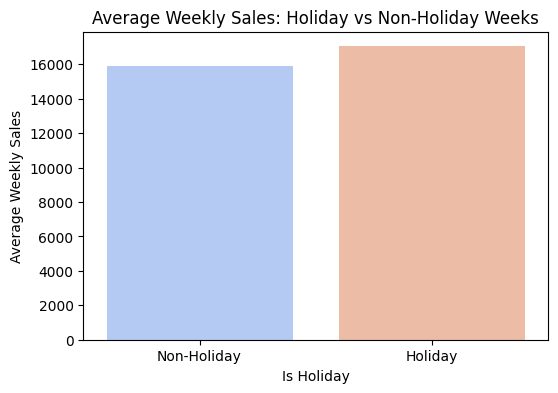

In [ ]:
# Check the effect of holidays (IsHoliday_x) on weekly sales
holiday_sales = combined_df.groupby('IsHoliday_x')['Weekly_Sales'].mean()

# Print the average sales for holiday and non-holiday weeks
print(holiday_sales)

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='coolwarm')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


The graph shows that average weekly sales during holidays are slightly higher than those during non-holidays, indicating a small increase in sales during holiday weeks.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Ensure Date column is datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df = combined_df.sort_values('Date')

# Step 2: Resample to weekly frequency
weekly_sales = combined_df.set_index('Date').resample('W')['Weekly_Sales'].mean()

# Step 3: Interpolate and clean missing values
weekly_sales = weekly_sales.interpolate()
weekly_sales = weekly_sales.dropna()

# Optional debug info
print(f"Weekly sales has {len(weekly_sales)} rows from {weekly_sales.index.min().date()} to {weekly_sales.index.max().date()}")

# Step 4: Choose seasonal period based on data length
if len(weekly_sales) >= 104:
    seasonal_period = 52  # yearly seasonality
elif len(weekly_sales) >= 24:
    seasonal_period = 12  # quarterly seasonality
else:
    raise ValueError("Not enough data for seasonal decomposition. Minimum 24 weekly points required.")

# Step 5: Perform decomposition
decomp_result = seasonal_decompose(weekly_sales, model='additive', period=seasonal_period)

# Step 6: Extract components
trend = decomp_result.trend.dropna()
seasonal = decomp_result.seasonal.dropna()
residual = decomp_result.resid.dropna()
common_index = trend.index.intersection(seasonal.index).intersection(residual.index)

# Step 7: Create plot
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    subplot_titles=('Trend Component', 'Seasonal Component', 'Residual Component'),
    vertical_spacing=0.1
)

# Trend
fig.add_trace(
    go.Scatter(x=common_index, y=trend.loc[common_index], mode='lines', name='Trend', line=dict(color='blue')),
    row=1, col=1
)

# Seasonal
fig.add_trace(
    go.Scatter(x=common_index, y=seasonal.loc[common_index], mode='lines', name='Seasonal', line=dict(color='orange')),
    row=2, col=1
)

# Residual (with lines + markers)
fig.add_trace(
    go.Scatter(
        x=common_index,
        y=residual.loc[common_index],
        mode='lines+markers',
        name='Residual',
        line=dict(color='green'),
        marker=dict(size=6)
    ),
    row=3, col=1
)

# Axes labels
fig.update_yaxes(title_text="Trend", row=1, col=1)
fig.update_yaxes(title_text="Seasonality", row=2, col=1)
fig.update_yaxes(title_text="Residual", row=3, col=1)

# Layout settings
fig.update_layout(
    title='Seasonal Decomposition of Weekly Sales',
    xaxis_title='Date',
    height=850,
    width=1300,
    showlegend=False,
    xaxis_rangeslider_visible=False
)
fig.update_xaxes(tickangle=45, showgrid=True)

# Display plot
fig.show()


Weekly sales has 143 rows from 2010-02-07 to 2012-10-28


The graph shows monthly fluctuations in total sales, with sharp peaks around early 2011 and early 2012, while other months have lower and varying sales.

It is obvious that sales are high during November and December, as it has prime holidays such as Black Friday, Thanksgiving, Christmas, and New Year, and they have large discounts going on.



In [ ]:
combined_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [ ]:
# plot weekly sales  on Date store wise
import plotly.express as px

# Store wise sales data
df= combined_df.groupby(['Date','Store'])['Weekly_Sales'].mean().reset_index()

nu = input("Enter Store number(1-45) :" )


fig = px.line(df.query(f'Store == {nu}'), x='Date', y='Weekly_Sales', title='Weekly Sales Over Time')

fig.update_layout(title= f'Weely Sales Over Time for Store {nu}')

fig.show()


Enter Store number(1-45) :5


In [ ]:
# min date in data set
start , end = min(combined_df['Date']), max(combined_df['Date'])
start, end

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [ ]:
# Extract dates for fetching Holiday data
# Generate the dates with a weekly frequency (every Friday)
dates = pd.date_range(start=start, end=end, freq='W-FRI')

# Convert to a DataFrame for the desired structure
dates_df = pd.DataFrame(dates, columns=['Date'])

# Display the first few rows
dates_df

,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
138,2012-09-28
139,2012-10-05
140,2012-10-12
141,2012-10-19


In [ ]:
! pip install nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Extract US Holidays
from nixtla.date_features import CountryHolidays

# Extract US Holidays
us_holidays = CountryHolidays(countries=['US'])

holidays_df = us_holidays(dates).reset_index(names='Date')

In [ ]:
holidays_df

,Date,US_New Year's Day,US_New Year's Day (observed),US_Memorial Day,US_Independence Day,US_Independence Day (observed),US_Labor Day,US_Veterans Day,US_Thanksgiving Day,US_Christmas Day,US_Christmas Day (observed),US_Martin Luther King Jr. Day,US_Washington's Birthday,US_Columbus Day,US_Veterans Day (observed)
0,2010-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2010-02-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012-09-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139,2012-10-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140,2012-10-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
141,2012-10-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop IsHoliday_x and IsHoliday_y
combined_df.drop(columns=['IsHoliday_x', 'IsHoliday_y'], inplace=True)

#Merge holiday dataset on Date
combined_df = combined_df.merge(holidays_df, on='Date',how='left')


In [ ]:
combined_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Type', 'Size', 'US_New Year's Day',
       'US_New Year's Day (observed)', 'US_Memorial Day',
       'US_Independence Day', 'US_Independence Day (observed)', 'US_Labor Day',
       'US_Veterans Day', 'US_Thanksgiving Day', 'US_Christmas Day',
       'US_Christmas Day (observed)', 'US_Martin Luther King Jr. Day',
       'US_Washington's Birthday', 'US_Columbus Day',
       'US_Veterans Day (observed)'],
      dtype='object')

In [ ]:
df = combined_df.copy()

# Separete Sales data in coorect shape
df = df.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

df.head()

,Date,Weekly_Sales
0,2010-02-05,16836.121997
1,2010-02-12,16352.056032
2,2010-02-19,16216.658979
3,2010-02-26,14899.549688
4,2010-03-05,15921.015727


In [ ]:
# Exogenous Features

demo = combined_df.copy()
demo = demo.groupby(['Date']).agg( {
    'Temperature': 'mean',        # Mean temperature
    'CPI': 'mean',                # Mean CPI
    'Fuel_Price': 'mean',         # Mean fuel price
    'Unemployment': 'mean',       # Mean unemployment
    'Size': 'mean'}  )

# Reset the index to access columns
demo = demo.reset_index()


demo.set_index(['Date'], inplace=True)



demo= demo.merge(holidays_df, on='Date', how='left')

demo

,Date,Temperature,CPI,Fuel_Price,Unemployment,Size,US_New Year's Day,US_New Year's Day (observed),US_Memorial Day,US_Independence Day,US_Independence Day (observed),US_Labor Day,US_Veterans Day,US_Thanksgiving Day,US_Christmas Day,US_Christmas Day (observed),US_Martin Luther King Jr. Day,US_Washington's Birthday,US_Columbus Day,US_Veterans Day (observed)
0,2010-02-05,33.277942,167.398405,2.717869,8.576731,137430.535364,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2010-02-12,33.361810,167.384138,2.696102,8.567309,137622.780785,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,37.038310,167.338966,2.673666,8.576351,137278.637219,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,38.629563,167.691019,2.685642,8.561375,137346.344629,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010-03-05,42.373998,167.727351,2.731816,8.572689,137576.841033,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012-09-28,68.151759,175.919639,3.858245,7.225855,136009.082039,0,0,0,0,0,0,0,0,0,0,0,0,0,0
139,2012-10-05,65.456811,175.998254,3.848435,6.942141,136334.755712,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140,2012-10-12,57.687284,176.123786,3.897425,6.952682,136228.789298,0,0,0,0,0,0,0,0,0,0,0,0,0,0
141,2012-10-19,60.152756,176.295499,3.878413,6.948928,135892.584068,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Merge Sales with features
df = df.merge(demo, on='Date', how='left')

df.columns

Index(['Date', 'Weekly_Sales', 'Temperature', 'CPI', 'Fuel_Price',
       'Unemployment', 'Size', 'US_New Year's Day',
       'US_New Year's Day (observed)', 'US_Memorial Day',
       'US_Independence Day', 'US_Independence Day (observed)', 'US_Labor Day',
       'US_Veterans Day', 'US_Thanksgiving Day', 'US_Christmas Day',
       'US_Christmas Day (observed)', 'US_Martin Luther King Jr. Day',
       'US_Washington's Birthday', 'US_Columbus Day',
       'US_Veterans Day (observed)'],
      dtype='object')

In [ ]:
def calculate_sales_velocity(df, store_number=None, dept_number=None):
    """
    Calculates and normalizes sales velocity for overall data, store, or department.

    Args:
    df (pd.DataFrame): The input DataFrame.
    store_number (int, optional): The store number to filter by. Defaults to None.
    dept_number (int, optional): The department number to filter by. Defaults to None.

    Returns:
    float: The normalized sales velocity.
    """
    velocity_df = df.copy()

    if store_number and dept_number:
        velocity_df = velocity_df.query('Store == @store_number and Dept == @dept_number')
    elif store_number:
        velocity_df = velocity_df.query('Store == @store_number')

    velocity_df = velocity_df.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

    n_days = velocity_df["Date"].nunique()
    Sales_n = velocity_df["Weekly_Sales"].sum()
    win_rate = 1  # Assuming since every week has sales

    sales_velocity = (Sales_n * win_rate) / n_days

    norm = (sales_velocity - velocity_df["Weekly_Sales"].min()) / (velocity_df["Weekly_Sales"].max() - velocity_df["Weekly_Sales"].min())

     # Format norm to two decimal places
    formatted_norm = f"{norm:.2f}"

    return formatted_norm

In [ ]:
calculate_sales_velocity(combined_df, store_number=33, dept_number= 33)

'0.15'

**Sales velocity** represents the speed at which you sell products. Sometimes, it is also called inventory velocity

- High Sales Velocity: Requires frequent restocking to avoid stockouts, with adjustments for delivery and sorting processes in multi-warehouse setups.

- Low Sales Velocity: Calls for minimal restocking to prevent overstock. Instead, focus on advertising, customer retention, and improving customer experience to boost sales.

## Predictive Models :

### TimeGPT

- TimeGPT is a production-ready generative pretrained transformer for time series. It’s capable of accurately predicting various domains such as retail, electricity, finance, and IoT with just a few lines of code.

- TimeGPT model is not based on any existing large language model(LLM). Instead, it is independently trained on a vast amount of time series data, and the large transformer model is designed to minimize the forecasting error.

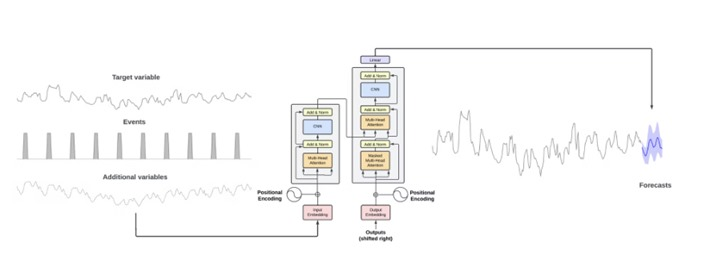

- Architecture This foundation model is based on self-attention, which was first presented in the paper Attention is all you need.





In [ ]:
from nixtla import NixtlaClient

nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-AcT6zVT9ySPiqlQQW6WKXYqDFF7EaNHxSKGNXiNEchHMNmSqj8nzJW2vnp4Vn6BfFrESfwAjZnKBg3TG'
)

In [ ]:
# Overall forcaste
def get_forecasts(df):

      #df= combined_df.copy()

      #input_df = df.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

      fcst_store = nixtla_client.forecast(
          df= df,
          h = 24,                                  #  Forecast horizon of 24 timestamps 24 weeks 6 months
          freq='W-FRI',                           # Frequency of date is Weekly
          time_col='Date',
          model='timegpt-1-long-horizon',         # Long horizon model
          target_col='Weekly_Sales',
          finetune_steps=15,                       # Model will go through 5 iterations of training
          X_df= df.drop(columns=['Weekly_Sales'])[:24], #Exogenous Features
          level = [50,90,80],
          add_history = True
      )

      fig = nixtla_client.plot(
          df = df,
          forecasts_df = fcst_store,
          time_col = 'Date',
          target_col = 'Weekly_Sales',
          engine = 'plotly',
          #max_insample_length= 24,
          level = [50,90,80]
        )

      fig.update_layout(
            title_text="Sales forcast for next 6 months",  # Your existing title
            height=250,
            width=1000
        )
      return fig, fcst_store

fig, fcst_df = get_forecasts(df)
fig

In [ ]:
fcst_df

,Date,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90
0,2011-11-04,17295.402,18044.377,18718.479,19121.900,16546.428,15872.326,15468.903
1,2011-11-11,17417.477,18166.451,18840.553,19243.975,16668.502,15994.400,15590.978
2,2011-11-18,16616.752,17365.727,18039.828,18443.250,15867.776,15193.676,14790.253
3,2011-11-25,19404.130,20153.105,20827.207,21230.629,18655.156,17981.055,17577.633
4,2011-12-02,16530.150,17279.125,17953.227,18356.648,15781.175,15107.074,14703.651
...,...,...,...,...,...,...,...,...
71,2013-03-15,16394.256,16450.436,16484.143,16495.377,16338.078,16304.371,16293.135
72,2013-03-22,16435.188,16700.598,16859.846,16912.928,16169.776,16010.529,15957.447
73,2013-03-29,16370.703,16579.514,16704.800,16746.562,16161.893,16036.606,15994.844
74,2013-04-05,16558.027,17574.969,18185.133,18388.521,15541.086,14930.921,14727.533


In [ ]:
fcst_df

start_date = fcst_df['Date'].min()
end_date = fcst_df['Date'].max()

print(start_date, end_date)

eval_df = df[['Date','Weekly_Sales']]
eval_df = eval_df[(eval_df['Date'] >= start_date) & (eval_df['Date'] <= end_date)].reset_index(drop=True)

print(eval_df.shape)
print(fcst_df.shape)

# Merge
eval_df = fcst_df.merge(eval_df, on=['Date'])
print(eval_df.shape)


2011-11-04 00:00:00 2013-04-12 00:00:00
(52, 2)
(76, 8)
(52, 9)


In [ ]:
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mae, rmse, smape

In [ ]:
eval_df["index"]= 1
eval_df

,Date,TimeGPT,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90,Weekly_Sales,index
0,2011-11-04,17295.402,18044.3770,18718.479,19121.900,16546.4280,15872.326,15468.9030,16471.071192,1
1,2011-11-11,17417.477,18166.4510,18840.553,19243.975,16668.5020,15994.400,15590.9780,16348.811046,1
2,2011-11-18,16616.752,17365.7270,18039.828,18443.250,15867.7760,15193.676,14790.2530,15683.546288,1
3,2011-11-25,19404.130,20153.1050,20827.207,21230.629,18655.1560,17981.055,17577.6330,22043.563476,1
4,2011-12-02,16530.150,17279.1250,17953.227,18356.648,15781.1750,15107.074,14703.6510,16496.511854,1
5,2011-12-09,17848.440,18597.4140,19271.516,19674.938,17099.4650,16425.363,16021.9400,18458.853056,1
6,2011-12-16,18921.041,19670.0160,20344.117,20747.540,18172.0660,17497.965,17094.5430,19942.149333,1
7,2011-12-23,20188.080,20937.0550,21611.156,22014.578,19439.1050,18765.004,18361.5820,25437.146122,1
8,2011-12-30,17652.457,18401.4320,19075.533,19478.955,16903.4820,16229.381,15825.9580,15332.154858,1
9,2012-01-06,16027.256,16776.2300,17450.332,17853.754,15278.2800,14604.180,14200.7570,15121.231736,1


In [ ]:
metrics = [mae, smape]

evaluation = evaluate(
    eval_df,
    target_col='Weekly_Sales',
    metrics=metrics,
    models=['TimeGPT'],
    id_col='index'
)
evaluation

,index,metric,TimeGPT
0,1,mae,716.007268
1,1,smape,0.021090


- After evaluation the metrics are like this MAE - 716 and SMAPE - 0.021


In [ ]:
# Store wise forcasting
df= combined_df.groupby(['Date','Store'])['Weekly_Sales'].mean().reset_index()

input_df = df.query('Store == 33')

In [ ]:
# Store wise forecasting
def get_forecasts_Store(data, store_number):
  '''
          This is the function to get the store wise forecasting

          Args : Dataset, Store number
          Returns : Plotly figure
  '''
  df = data.copy()

  df = combined_df.groupby(['Date', 'Store'])['Weekly_Sales'].mean().reset_index()

  input_df = df.query('Store == 33')

  fcst_store = nixtla_client.forecast(
      df=input_df,
      h=24,                                  # Forecast horizon of 24 timestamps (24 weeks, 6 months)
      freq='W-FRI',                          # Frequency of date is Weekly
      time_col='Date',
      model='timegpt-1-long-horizon',        # Long horizon model
      target_col='Weekly_Sales',
      finetune_steps=15,                     # Model will go through 5 iterations of training
      level=[50, 90, 80],
      add_history=True
  )

  fig = nixtla_client.plot(
      df=input_df,
      forecasts_df=fcst_store,
      time_col='Date',
      target_col='Weekly_Sales',
      engine='plotly',
      # max_insample_length=24,
      level=[50, 90, 80]
  )

  fig.update_layout(
      title_text=f"{store_number} Store's sales forecast for next 6 months",  # Your existing title
      height=250,
      width=1000
  )

  return fig

get_forecasts_Store(combined_df, 33)


/usr/local/lib/python3.11/dist-packages/nixtla/nixtla_client.py:383: UserWarning:

`df` contains the following exogenous features: ['Store'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.



In [ ]:
# Store --> dept wise

def get_forecasts_Dept(data, store_number, dept_number):
  '''
      This is the function to get the department-wise forecasting

      Args : Dataset, Store number, Department number
      Returns : Plotly figure
  '''
  df = data.copy()  # Create a copy of combined_df instead of grouping directly

  df = df.query('Store == @store_number')  # Now you can use .query() on the DataFrame and select store number

  df['Dept'].nunique()  # Number of departments a store has

  input_df = df.query('Dept == @dept_number')  # Select dept_number

  try:
      fcst_store = nixtla_client.forecast(
          df=input_df,
          h=24,                                  # Forecast horizon of 24 timestamps (24 weeks, 6 months)
          freq='W-FRI',                           # Frequency of date is Weekly
          time_col='Date',
          model='timegpt-1-long-horizon',         # Long horizon model
          target_col='Weekly_Sales',
          finetune_steps=15,                       # Model will go through 5 iterations of training
          level=[50, 90, 80],
          # add_history = True
      )

  except ValueError as e:
      print(f"Department number {dept_number} is not on sales for the entire time to forecast")

  fig = nixtla_client.plot(
      df=input_df,
      forecasts_df=fcst_store,
      time_col='Date',
      target_col='Weekly_Sales',
      engine='plotly',
      # max_insample_length=24,
      level=[50, 90, 80]
  )

  fig.update_layout(
      title_text=f"Next 6 months forecast for Department {dept_number} in Store {store_number}",  # Your existing title
      height=250,
      width=1000
  )

  return fig

get_forecasts_Dept(combined_df, 25, 10)


/usr/local/lib/python3.11/dist-packages/nixtla/nixtla_client.py:383: UserWarning:

`df` contains the following exogenous features: ['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', "US_New Year's Day", "US_New Year's Day (observed)", 'US_Memorial Day', 'US_Independence Day', 'US_Independence Day (observed)', 'US_Labor Day', 'US_Veterans Day', 'US_Thanksgiving Day', 'US_Christmas Day', 'US_Christmas Day (observed)', 'US_Martin Luther King Jr. Day', "US_Washington's Birthday", 'US_Columbus Day', 'US_Veterans Day (observed)'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.



## Random Forest

In [ ]:
# Dataset used
aggregated_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [ ]:
aggregated_df = aggregated_df.groupby(['Date'], as_index=False).agg({
    'Weekly_Sales': 'mean',        # Sum weekly sales
    'Temperature': 'mean',        # Average Temperature
    'Fuel_Price': 'mean',         # Average Fuel Price
    'CPI': 'mean',                # Average CPI
    'Unemployment': 'mean',       # Average Unemployment
    'Size': 'mean',               # Average Size
    'IsHoliday_x': 'mean'       # Average Holiday status (as numeric)
})

In [ ]:
aggregated_df['Date'] = pd.to_datetime(aggregated_df['Date'], format='%d/%m/%Y')

In [ ]:
# Add lag features to incorporate the effect of previous weeks' sales:

aggregated_df['Lag_1_Week'] = aggregated_df['Weekly_Sales'].shift(1)
aggregated_df['Lag_2_Weeks'] = aggregated_df['Weekly_Sales'].shift(2)


In [ ]:
# Add rolling averages
from sklearn.impute import SimpleImputer

aggregated_df['Rolling_4_Week'] = aggregated_df['Weekly_Sales'].rolling(window=4).mean()
# aggregated_df['Rolling_5_Week'] = aggregated_df['Weekly_Sales'].rolling(window=5).mean()

# Impute NaNs (using mean strategy)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' if preferred
aggregated_df[['Lag_1_Week', 'Lag_2_Weeks', 'Rolling_4_Week']] = imputer.fit_transform(
    aggregated_df[['Lag_1_Week', 'Lag_2_Weeks', 'Rolling_4_Week']]
)

# Check if NaNs are handled
print(aggregated_df.isnull().sum())

Date              0
Weekly_Sales      0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
Size              0
IsHoliday_x       0
Lag_1_Week        0
Lag_2_Weeks       0
Rolling_4_Week    0
dtype: int64


In [ ]:
# Extract date-related features:
aggregated_df['Year'] = aggregated_df['Date'].dt.year

aggregated_df['Month'] = aggregated_df['Date'].dt.month
aggregated_df['Day_of_Week'] = aggregated_df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday


In [ ]:
from sklearn.model_selection import train_test_split

# Filter training data (2010 and 2011) and testing data (2012)
train_df = aggregated_df[aggregated_df['Year'].isin([2010, 2011])]
test_df = aggregated_df[aggregated_df['Year'] == 2012]

# Separate features (X) and target (y) for training and testing sets
X_train = train_df.drop(columns=['Weekly_Sales', 'Date','Year'])
y_train = train_df[['Weekly_Sales', 'Date']]
X_test = test_df.drop(columns=['Weekly_Sales', 'Date', 'Year'])
y_test = test_df[['Weekly_Sales', 'Date']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import numpy as np
import plotly.graph_objects as go

In [ ]:
# Define SMAPE function to calculate metrics
def smape(y_true, y_pred):
    # Ensure no division by zero and calculate SMAPE
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0  # Handle cases where both y_true and y_pred are zero
    return 2 * np.mean(diff)


In [ ]:
# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train['Weekly_Sales'])

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred)
mse = mean_squared_error(y_test['Weekly_Sales'], y_pred)
rmse = np.sqrt(mse)

smape_score = smape(y_test['Weekly_Sales'], y_pred)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Sort the data by date to avoid zigzag patterns
y_test_sorted = y_test.sort_values(by='Date')
y_pred_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_sorted,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Predicted vs Actual Weekly Sales (Random Forest)',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()


SMAPE: 0.12600840072527475
Mean Absolute Error (MAE): 2103.042574525703
Root Mean Squared Error (RMSE): 2287.18258931715


- Without Hyperparameter tuning the performance of RandomForest is like this MAE - 2103.04 and SMAPE - 0.12.

In [ ]:
# Hyperparameter tuning for RandomForest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train['Weekly_Sales'])

best_params_rf = grid_search_rf.best_estimator_
# best_params_
print(f"Best parameters: {best_params_rf}")
y_pred= best_params_rf.predict(X_test)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: RandomForestRegressor(bootstrap=False, max_depth=10, max_features='log2',
                      random_state=42)


In [ ]:
# y_pred= grid_search.predict(X_test)

y_pred= best_params_rf.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred)
mse = mean_squared_error(y_test['Weekly_Sales'], y_pred)
rmse = np.sqrt(mse)

smape_score = smape(y_test['Weekly_Sales'], y_pred)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Sort the data by date to avoid zigzag patterns
y_test_sorted = y_test.sort_values(by='Date')
y_pred_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_sorted,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Predicted vs Actual Weekly Sales (Random Forest)',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()


SMAPE: 0.11472964967304126
Mean Absolute Error (MAE): 1909.1066440287987
Root Mean Squared Error (RMSE): 2172.5769964751335


- After Hyperparameter tunning The performance of RandomForest is like this MAE- 1909.10 and SMAPE - 0.11

## XG Boost

In [ ]:
# Initialize and fit the XGBoost model
xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train['Weekly_Sales'])

# Predict on the test data
y_pred_xg = xg_model.predict(X_test)

# Evaluate the model
xg_mse = mean_squared_error(y_test['Weekly_Sales'], y_pred_xg)
xg_rmse = np.sqrt(xg_mse)

xg_mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred_xg)  # Mean Absolute Error
smape_score = smape(y_test['Weekly_Sales'], y_pred_xg)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print(f"XGBoost RMSE: {xg_rmse}")
print(f"XGBoost MAE: {xg_mae}")

# Sort the data by date to ensure the plot is smooth
y_test_sorted = y_test.sort_values(by='Date')
y_pred_xg_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred_xg))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_xg_sorted,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='XGBoost Predicted vs Actual Weekly Sales',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()

SMAPE: 0.11786450574865677
XGBoost RMSE: 2078.117066321338
XGBoost MAE: 1957.200897935475


 - Without Hyperparameter tunning The performance of XGboost is like this MAE- 1957.20 and SMAPE - 0.11


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
from xgboost import XGBRegressor


# Define the XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    scoring=make_scorer(mean_squared_error, greater_is_better=False),  # Using MSE as scoring
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train['Weekly_Sales'])

# Output best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score (Negative MSE):", random_search.best_score_)

# Predict using the best model
best_model_xgb = random_search.best_estimator_
y_pred_xg = best_model_xgb.predict(X_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Score (Negative MSE): -2446185.64901817


In [ ]:
# Evaluate the model
xg_mse = mean_squared_error(y_test['Weekly_Sales'], y_pred_xg)
xg_rmse = np.sqrt(xg_mse)  # Root Mean Squared Error
xg_mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred_xg)  # Mean Absolute Error
smape_score = smape(y_test['Weekly_Sales'], y_pred_xg)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print(f"XGBoost RMSE: {xg_rmse}")
print(f"XGBoost MAE: {xg_mae}")

# Sort the data by date to ensure the plot is smooth
y_test_sorted = y_test.sort_values(by='Date')
y_pred_xg_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred_xg))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_xg_sorted,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='XGBoost Predicted vs Actual Weekly Sales',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()

SMAPE: 0.05048675854997637
XGBoost RMSE: 1167.8250804542872
XGBoost MAE: 818.1701330195078


- After Hyperparameter tunning using RandomizedSearchCV. The performance of XGboost is like this MAE- 1167.82 and SMAPE - 0.05


In [ ]:
# hypertuning for XG Boost using GridSearch

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model and parameter grid
xgb_model = XGBRegressor()
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train['Weekly_Sales'])

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score (neg_mean_squared_error): ", grid_search.best_score_)

# Predict using the best model
best_model_xgb1 = grid_search.best_estimator_
y_pred_xg = best_model_xgb1.predict(X_test)


Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
Best score (neg_mean_squared_error):  -2998173.4018512396


In [ ]:
# Evaluate the model
xg_mse = mean_squared_error(y_test['Weekly_Sales'], y_pred_xg)
xg_rmse = np.sqrt(xg_mse)  # Root Mean Squared Error
xg_mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred_xg)  # Mean Absolute Error
smape_score = smape(y_test['Weekly_Sales'], y_pred_xg)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print(f"XGBoost RMSE: {xg_rmse}")
print(f"XGBoost MAE: {xg_mae}")

# Sort the data by date to ensure the plot is smooth
y_test_sorted = y_test.sort_values(by='Date')
y_pred_xg_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred_xg))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_xg_sorted,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='XGBoost Predicted vs Actual Weekly Sales',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()

SMAPE: 0.030798979126162758
XGBoost RMSE: 662.7223057191973
XGBoost MAE: 482.27961310613875


- AFter Hyperparameter tunning using GridSearchCV. The performance of XGboost is like this MAE- 662.72 and SMAPE - 0.03

## Ensemble of Random Forest and XGBoost

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Create the ensemble model (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[('rf', best_params_rf), ('xg', best_model_xgb1)])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train['Weekly_Sales'])

# Predict on the test data
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test['Weekly_Sales'], y_pred_ensemble)
ensemble_rmse = np.sqrt(ensemble_mse)
  # RMSE
ensemble_mae = mean_absolute_error(y_test['Weekly_Sales'], y_pred_ensemble)  # MAE
smape_score = smape(y_test['Weekly_Sales'], y_pred_ensemble)

# Print the evaluation metrics
print(f"SMAPE: {smape_score}")
print(f"Ensemble Model RMSE: {ensemble_rmse}")
print(f"Ensemble Model MAE: {ensemble_mae}")

# # Plot Predicted vs Actual values
# plt.figure(figsize=(10, 6))
# plt.plot(y_test['Date'], y_test['Weekly_Sales'], color='blue', label='Actual')
# plt.plot(y_test['Date'], y_pred_xg, color='red', label='Predicted')
# # plt.scatter(y_test['Weekly_Sales'], y_pred_ensemble, color='blue', alpha=0.6, label='Predicted Values')  # Blue dots for predicted values
# # plt.plot([min(y_test['Weekly_Sales']), max(y_test['Weekly_Sales'])], [min(y_test['Weekly_Sales']), max(y_test['Weekly_Sales'])], color='red', linestyle='--', label='Ideal (y=x)')  # Red line for ideal predictions
# plt.title('Predicted vs Actual Values (Ensemble Model)')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')

# # Add a legend to the plot
# plt.legend()

# # Show the plot
# plt.show()

import plotly.graph_objects as go

# Sort the data by date to ensure smooth plotting
y_test_sorted = y_test.sort_values(by='Date')
y_pred_ensemble_sorted = [y for _, y in sorted(zip(y_test['Date'], y_pred_ensemble))]

# Create a Plotly figure
fig = go.Figure()

# Add actual weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_test_sorted['Weekly_Sales'],
    mode='lines',
    name='Actual',
    line=dict(color='blue')
))

# Add ensemble model predicted weekly sales
fig.add_trace(go.Scatter(
    x=y_test_sorted['Date'],
    y=y_pred_ensemble_sorted,
    mode='lines',
    name='Predicted (Ensemble)',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Ensemble Model Predicted vs Actual Weekly Sales',
    xaxis_title='Week',
    yaxis_title='Weekly Sales',
    legend_title='Legend',
    template='plotly_white',
    width=1000,
    height=600
)

# Show plot
fig.show()



SMAPE: 0.0691865453219877
Ensemble Model RMSE: 1312.10443410744
Ensemble Model MAE: 1113.492920854777


- Performance of ensemble model on Random Forest and XGBoost is MAE - 1113.49 and SMAPE - 0.069

## Arima

In [ ]:
df_ariima['Date'] = pd.to_datetime(df_ariima['Date'], dayfirst=True)

# sales data
df_ariima = df_ariima.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

In [ ]:
df_ariima.head()

,Date,Weekly_Sales
0,2010-02-05,16836.121997
1,2010-02-12,16352.056032
2,2010-02-19,16216.658979
3,2010-02-26,14899.549688
4,2010-03-05,15921.015727


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Ensure Date is parsed correctly
df_ariima['Date'] = pd.to_datetime(df_ariima['Date'], format='%m/%d/%Y')

# Group by Date and average sales
df_ariima = df_ariima.groupby('Date')['Weekly_Sales'].mean().reset_index()

# Split into train/test (80/20)
train_size = int(len(df_ariima) * 0.8)
train, test = df_ariima.iloc[:train_size], df_ariima.iloc[train_size:]

# Define parameter grids
p = list(range(1, 4))
d = list(range(0, 2))
q = list(range(0, 2))

# ARIMA tuning function
def evaluate_models(dataset, p_values, d_values, q_values):
    series = dataset['Weekly_Sales'].astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = ARIMA(series, order=order)
                    model_fit = model.fit()
                    forecast = model_fit.forecast(steps=len(test))
                    mae = mean_absolute_error(test['Weekly_Sales'], forecast)
                    if mae < best_score:
                        best_score, best_cfg = mae, order
                        print(f'ARIMA{order} MAE={mae:.2f}')
                except:
                    continue
    print(f'Best ARIMA{best_cfg} MAE={best_score:.2f}')
    return best_cfg

# Find best ARIMA order
best_param = evaluate_models(train, p, d, q)

# Fit ARIMA with best order
model = ARIMA(train['Weekly_Sales'], order=best_param)
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=len(test))

# Evaluation metrics
mae = mean_absolute_error(test['Weekly_Sales'], forecast)

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

smape_value = smape(test['Weekly_Sales'], forecast)

print(f"📉 MAE: {mae:.2f}")
print(f"📉 SMAPE: {smape_value:.2f}%")


ARIMA(1, 0, 0) MAE=508.82
ARIMA(1, 1, 1) MAE=504.16
Best ARIMA(1, 1, 1) MAE=504.16
📉 MAE: 514.68
📉 SMAPE: 3.25%


In [ ]:
first_date = test['Date'].iloc[0]
first_date

Timestamp('2012-04-13 00:00:00')

In [ ]:
test

,Date,Weekly_Sales
114,2012-04-13,15663.171451
115,2012-04-20,15150.430178
116,2012-04-27,14799.187167
117,2012-05-04,15947.275103
118,2012-05-11,15784.015806
119,2012-05-18,15856.396620
120,2012-05-25,16284.414590
121,2012-06-01,16405.589439
122,2012-06-08,16774.044520
123,2012-06-15,16377.574662


In [ ]:
test.index[0]

114

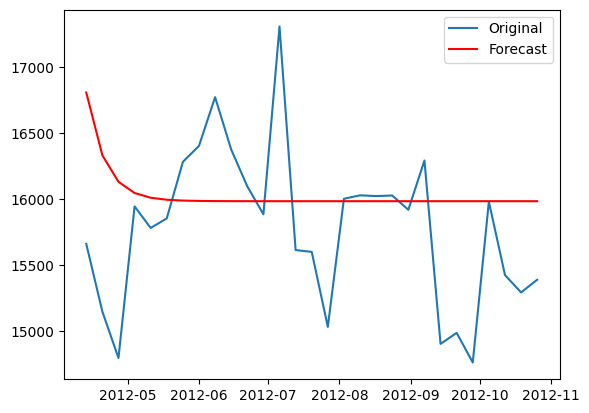

In [ ]:
plt.plot(test['Date'], test['Weekly_Sales'], label='Original')
plt.plot(pd.date_range(first_date , periods=len(test), freq='W-FRI'), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

- Performance of ARIMA model,  MAE: 514.68 and SMAPE: 3.25%

## Contingency Table

In [ ]:
import pandas as pd

data = {
    "Metrics / Models": ["Mean Absolute Error (MAE)", "Symmetric Mean Absolute Percentage Error (SMAPE)"],
    "TimeGPT": [716, 0.021],
    "ARIMA": [514.68, 3.25],
    "Ensemble (RF + XGB)": [1113.49, 0.069],
    "XGBoost": [482.27, 0.030],
    "Random Forest": [1909.10, 0.114],
}

score_df = pd.DataFrame(data)


In [ ]:
import plotly.graph_objects as go

header_color = '#1a1a1a'
row_colors = ['#2a2a2a', '#3a3a3a']

fig = go.Figure(data=[go.Table(
    header=dict(values=list(score_df.columns),
                fill_color=header_color,
                font=dict(color='white', size=14),
                align='center'),
    cells=dict(values=[score_df[col] for col in score_df.columns],
               fill_color=[row_colors * (len(score_df) // 2 + 1)],
               font=dict(color='white', size=13),
               align='center'))
])

fig.update_layout(title="📊 Contingency Table: Model Evaluation", title_font_size=20)
fig.show()


##Dashboard


https://huggingface.co/spaces/AnveshAlluri/Walmart_Inventory

In [ ]:
# Orbit for Bayesian structural time series
!pip install orbit-ml

# Optional: for nice plots and manipulations

!pip install pyro-ppl  # Orbit depends on pyro for Bayesian inference


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.9/446.9 kB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 M

In [ ]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import numpy as np
import holidays
import matplotlib.ticker as mtick

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

# Step 2: Define all potential regressors
all_regressor_cols = [
    'Temperature', 'CPI', 'Fuel_Price', 'Unemployment', 'Size',
    'US_New Year\'s Day', 'US_New Year\'s Day (observed)', 'US_Memorial Day',
    'US_Independence Day', 'US_Independence Day (observed)', 'US_Labor Day',
    'US_Veterans Day', 'US_Thanksgiving', 'US_Christmas Day',
    'US_Christmas Day (observed)', 'US_Martin Luther King Jr. Day',
    'US_Washington\'s Birthday', 'US_Columbus Day', 'US_Veterans Day (observed)'
]

# Step 3: Keep only columns that exist in your df
regressor_cols = [col for col in all_regressor_cols if col in df.columns]

# Step 4: Clean the data
df = df.sort_values('Date').reset_index(drop=True)
df = df.groupby('Date', as_index=False).agg({
    'Weekly_Sales': 'sum',
    **{col: 'first' for col in regressor_cols}
})

# Step 5: Define and train the DLT model (stan-mcmc for full posterior)
dlt = DLT(
    response_col='Weekly_Sales',
    date_col='Date',
    seasonality=52,
    regressor_col=regressor_cols,
    estimator='stan-mcmc',
    seasonality_sm_input=0.05,
    level_sm_input=0.3,
    n_bootstrap_draws=1000
)
dlt.fit(df=df)

# Step 6: In-sample forecast
insample_fcst = dlt.predict(df=df)

# Step 7: Create future dataframe (next 12 weeks)
future_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(weeks=1), periods=12, freq='W')
future_df = pd.DataFrame({'Date': future_dates})

num_regressors = ['Temperature', 'CPI', 'Fuel_Price', 'Unemployment', 'Size']
for col in num_regressors:
    if col in df.columns:
        future_df[col] = df[col].iloc[-1]

us_holidays = holidays.US()
for col in regressor_cols:
    if 'US_' in col:
        holiday_name = col.replace('US_', '').replace('_', ' ')
        future_df[col] = future_df['Date'].apply(
            lambda d: 1 if d in us_holidays and holiday_name in us_holidays.get(d) else 0
        )

# Step 8: Out-of-sample forecast
future_fcst = dlt.predict(df=future_df)
future_df['Weekly_Sales'] = np.nan

# Step 9: Forecast Plot with CI & Smoothing
df['smooth_actual'] = df['Weekly_Sales'].rolling(window=4).mean()
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['smooth_actual'], label='Actual Sales (4-week MA)', linewidth=2, color='tab:blue')
plt.plot(df['Date'], insample_fcst['prediction'], label='DLT In-sample Prediction', linestyle='--', color='tab:orange')
plt.fill_between(df['Date'], insample_fcst['prediction_5'], insample_fcst['prediction_95'], alpha=0.2, label='In-sample 90% CI', color='tab:orange')
plt.plot(future_df['Date'], future_fcst['prediction'], label='DLT Future Forecast', linestyle='--', color='tab:green')
plt.fill_between(future_df['Date'], future_fcst['prediction_5'], future_fcst['prediction_95'], alpha=0.2, label='Future 90% CI', color='tab:green')
plt.title('Actual vs Forecasted Weekly Sales (With CI & Smoothing)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Manual component plots
# Handle safely based on what columns exist in insample_fcst
# Step 11: Metrics
y_true = df['Weekly_Sales']
y_pred = insample_fcst['prediction']
mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
smape = 100 * (np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))))

print(f'MAPE: {mape:.2%}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'sMAPE: {smape:.2f}%')

# Step 12: Orbit vs TimeGPT Comparison
timegpt_metrics = {'mae': 716.00, 'smape': 2.1}
labels = ['MAE', 'sMAPE']
orbit_values = [mae, smape]
timegpt_values = [timegpt_metrics['mae'], timegpt_metrics['smape']]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, orbit_values, width, label='Orbit DLT')
ax.bar(x + width/2, timegpt_values, width, label='TimeGPT')
ax.set_ylabel('Metric Value')
ax.set_title('Orbit DLT vs TimeGPT')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}' if y > 100 else f'{y:.2f}%'))
plt.show()


2025-04-10 06:52:09 - orbit - INFO - Optimizing (CmdStanPy) with algorithm: LBFGS.
INFO:orbit:Optimizing (CmdStanPy) with algorithm: LBFGS.


 Final model input size: 143 rows
 Regressors used: []

 No actual sales data available for evaluation. Forecast metrics skipped.


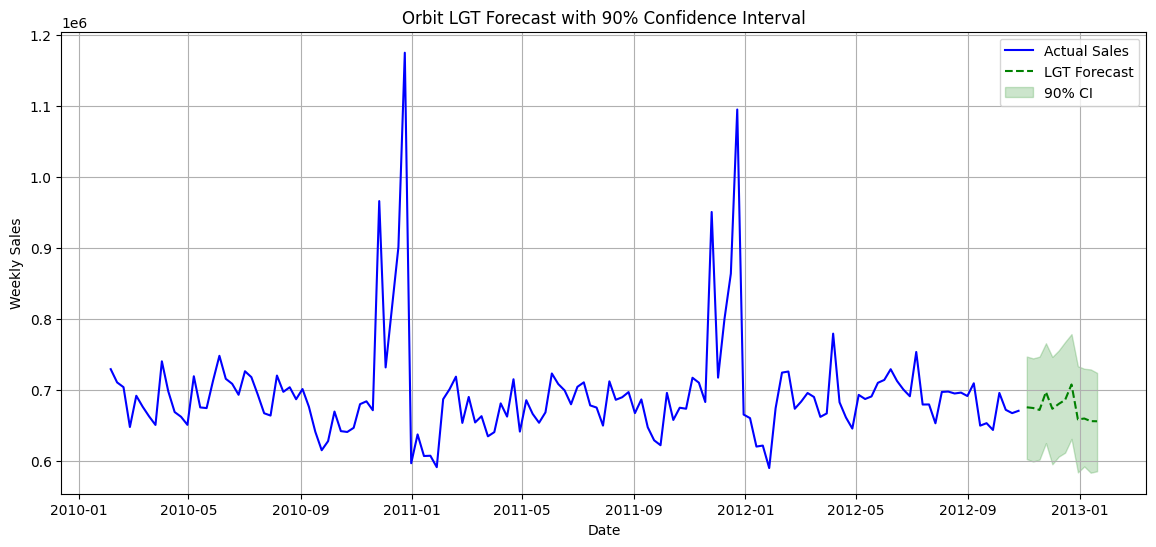

In [ ]:
# Step 1: Imports
import pandas as pd
import numpy as np
from orbit.models import LGT
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import holidays

# Step 2: Define potential regressors
all_regressor_cols = [
    'Temperature', 'CPI', 'Fuel_Price', 'Unemployment', 'Size',
    'US_New Year\'s Day', 'US_New Year\'s Day (observed)', 'US_Memorial Day',
    'US_Independence Day', 'US_Independence Day (observed)', 'US_Labor Day',
    'US_Veterans Day', 'US_Thanksgiving', 'US_Christmas Day',
    'US_Christmas Day (observed)', 'US_Martin Luther King Jr. Day',
    'US_Washington\'s Birthday', 'US_Columbus Day', 'US_Veterans Day (observed)'
]

# Step 3: Prepare and clean your DataFrame
df = df.sort_values('Date').reset_index(drop=True)

# Aggregate sales and regressors by date
df = df.groupby('Date', as_index=False).agg({
    'Weekly_Sales': 'sum',
    **{col: 'mean' for col in all_regressor_cols if col in df.columns}
})

# Filter regressors that still exist in df
regressor_cols = [col for col in all_regressor_cols if col in df.columns]

# Drop rows with NaNs
df = df.dropna(subset=['Weekly_Sales'] + regressor_cols).reset_index(drop=True)

# Final check: only include regressors with correct length
valid_regressor_cols = []
for col in regressor_cols:
    if len(df[col]) == len(df['Weekly_Sales']):
        valid_regressor_cols.append(col)

print(f" Final model input size: {len(df)} rows")
print(f" Regressors used: {valid_regressor_cols}")

# Step 4: Fit the LGT model
lgt = LGT(
    response_col='Weekly_Sales',
    date_col='Date',
    seasonality=52,
    regressor_col=valid_regressor_cols if valid_regressor_cols else None,
    estimator='stan-map',
    level_sm_input=0.05,
    slope_sm_input=0.05,
    seasonality_sm_input=0.05,
    regressor_sign='auto',
    n_bootstrap_draws=1000
)

lgt.fit(df=df)

# Step 5: Create future dataframe (next 12 weeks)
future_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(weeks=1), periods=12, freq='W')
future_df = pd.DataFrame({'Date': future_dates})

# Use last 4-week rolling average for numeric regressors
for col in ['Temperature', 'CPI', 'Fuel_Price', 'Unemployment', 'Size']:
    if col in df.columns:
        future_df[col] = df[col].rolling(4).mean().iloc[-1]

# Add holiday dummies
us_holidays = holidays.US()
for col in valid_regressor_cols:
    if 'US_' in col:
        holiday_name = col.replace('US_', '').replace('_', ' ')
        future_df[col] = future_df['Date'].apply(
            lambda d: 1 if d in us_holidays and holiday_name in us_holidays.get(d, '') else 0
        )

# Step 6: Forecast
future_fcst = lgt.predict(df=future_df)

# Step 7: Evaluate only if actuals are available
actual_test = df[df['Date'] >= future_df['Date'].min()]
y_true = actual_test['Weekly_Sales'].values[:len(future_fcst)]
y_pred = future_fcst['prediction'].values[:len(y_true)]

if len(y_true) > 0:
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    print(f"\n Final Orbit LGT Forecast Metrics")
    print(f"MAE   : {mae:.2f}")
    print(f"RMSE  : {rmse:.2f}")
    print(f"MAPE  : {mape:.2%}")
    print(f"sMAPE : {smape:.2f}%")
else:
    print("\n No actual sales data available for evaluation. Forecast metrics skipped.")

# Step 8: Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Weekly_Sales'], label='Actual Sales', color='blue')
plt.plot(future_df['Date'], future_fcst['prediction'], label='LGT Forecast', linestyle='--', color='green')
plt.fill_between(future_df['Date'], future_fcst['prediction_5'], future_fcst['prediction_95'],
                 alpha=0.2, label='90% CI', color='green')
plt.title('Orbit LGT Forecast with 90% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Step 1: Split data
test_df = df.iloc[-12:]       # Last 12 weeks as "forecast target"
train_df = df.iloc[:-12]      # Use the rest for training

# Step 2: Reuse regressor columns (if any)
valid_regressor_cols = [col for col in train_df.columns if col in all_regressor_cols]

# Step 3: Refit model on train data
lgt = LGT(
    response_col='Weekly_Sales',
    date_col='Date',
    seasonality=52,
    regressor_col=valid_regressor_cols if valid_regressor_cols else None,
    estimator='stan-map',
    level_sm_input=0.05,
    slope_sm_input=0.05,
    seasonality_sm_input=0.05,
    regressor_sign='auto',
    n_bootstrap_draws=1000
)
lgt.fit(df=train_df)

# Step 4: Predict on test period
backtest_fcst = lgt.predict(df=test_df)

# Step 5: Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

y_true = test_df['Weekly_Sales'].values
y_pred = backtest_fcst['prediction'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred)
smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

print(f"\n📊 Orbit LGT Backtest Evaluation (Past 12 Weeks)")
print(f"MAE   : {mae:.2f}")
print(f"RMSE  : {rmse:.2f}")
print(f"MAPE  : {mape:.2%}")
print(f"sMAPE : {smape:.2f}%")


2025-04-10 06:54:53 - orbit - INFO - Optimizing (CmdStanPy) with algorithm: LBFGS.
INFO:orbit:Optimizing (CmdStanPy) with algorithm: LBFGS.



📊 Orbit LGT Backtest Evaluation (Past 12 Weeks)
MAE   : 15355.40
RMSE  : 17993.91
MAPE  : 2.26%
sMAPE : 2.27%


In [ ]:
import plotly.graph_objects as go

# Define metrics
models = ['TimeGPT', 'Orbit LGT']
mae_values = [716.00, 15355.40]
smape_values = [2.10, 2.27]

# Create grouped bar chart
fig = go.Figure(data=[
    go.Bar(name='MAE', x=models, y=mae_values, text=[f"{v:,.0f}" for v in mae_values], textposition='auto'),
    go.Bar(name='sMAPE (%)', x=models, y=smape_values, text=[f"{v:.2f}%" for v in smape_values], textposition='auto')
])

# Customize layout
fig.update_layout(
    title='Forecasting Metrics: TimeGPT vs Orbit LGT',
    xaxis_title='Model',
    yaxis_title='Metric Value',
    barmode='group',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()


# Task
Generate a comprehensive, professionally structured markdown document summarizing the multi-level dashboard's purpose and functionality, and explaining the Sales Velocity KPI and its relevance to warehouse optimization based on the provided notebook content. Include clear instructions on how to copy this content into a Word document and how to include relevant graphs by taking screenshots from the notebook outputs.

## Summarize Dashboard and Key Performance Indicator (KPI)

### Subtask:
Describe the multi-level dashboard's purpose and functionality, and explain the Sales Velocity KPI and its relevance to warehouse optimization.


The multi-level dashboard developed in this project serves as a comprehensive analytical tool for Walmart's retail management.

**Purpose and Functionality:**
*   **Overall Sales Analysis**: Provides insights into the aggregated sales performance across all stores and departments.
*   **Store-wise Sales Analysis**: Offers detailed sales data for individual stores, enabling identification of high and low performing locations.
*   **Department-wise Sales Analysis**: Breaks down sales performance by department, allowing for targeted improvements in specific product categories.
*   **Key Performance Indicators (KPIs)**: Visualizes crucial metrics including:
    *   **Sales Velocity**: To measure inventory movement efficiency.
    *   **Top 10 Performing Stores and Departments**: Highlights areas of excellence.
    *   **Best-Performing Months**: Identifies seasonal trends and peak sales periods.

This dashboard is designed to integrate predictive analytics with visualization to help Walmart align inventory and warehouse management strategies with forecasted demand, ultimately enhancing operational efficiency and customer satisfaction. The dashboard is built on Streamlit and deployed on HuggingFace Spaces.

**Sales Velocity as a KPI for Warehouse Management:**

Sales Velocity is defined as the speed at which products are sold. It directly impacts warehouse management strategies:

*   **High Sales Velocity**: Products with high sales velocity require frequent restocking to prevent stockouts. This also implies adjusting for efficient delivery and sorting processes, especially in multi-warehouse setups, to ensure continuous availability.
*   **Low Sales Velocity**: Products with low sales velocity should be restocked minimally to avoid overstocking and reduce holding costs. For these items, the focus shifts to marketing strategies, customer retention, and improving the overall customer experience to boost sales rather than increasing inventory.

## Final Task

### Subtask:
Compile all the summarized information into a comprehensive, clean, and professionally structured document in markdown format. I will also provide instructions on how to copy this content into a Word document and how to include the relevant graphs by taking screenshots from the notebook outputs.


## Summary:

### Data Analysis Key Findings
*   The multi-level dashboard serves as a comprehensive analytical tool for Walmart's retail management, providing insights into overall, store-wise, and department-wise sales.
*   Key Performance Indicators (KPIs) visualized include Sales Velocity, Top 10 Performing Stores/Departments, and Best-Performing Months.
*   The dashboard integrates predictive analytics to align inventory and warehouse management strategies with forecasted demand.
*   Sales Velocity is defined as the speed at which products are sold, directly impacting warehouse management.
*   **High Sales Velocity products** necessitate frequent restocking, efficient delivery, and sorting processes to prevent stockouts and ensure continuous availability.
*   **Low Sales Velocity products** require minimal restocking to avoid overstocking and reduce holding costs, with a focus on marketing and customer experience improvements.

### Insights or Next Steps
*   The dashboard's capability to integrate predictive analytics with sales data offers a proactive approach to inventory and warehouse management, optimizing stock levels and operational efficiency.
*   Implementing tailored strategies based on Sales Velocity (e.g., frequent restocking for high velocity vs. marketing focus for low velocity) is critical for reducing holding costs and preventing stockouts, thereby enhancing customer satisfaction.


# Task
```markdown
# Walmart Sales Forecasting & Warehouse Optimization: Project Summary

## Stakeholder: Principal Sales Officer

## Abstract

This project focuses on leveraging sales forecasting and warehouse management optimization techniques for 45 Walmart stores over a three-year period. The dataset incorporates various critical variables such as store ID, department, sales figures, Consumer Price Index (CPI), fuel prices, holiday indicators, temperature, store size, and type, enabling a holistic analytical approach. The primary objectives are to accurately predict future sales trends and to derive actionable insights that can significantly enhance warehouse operations.

To achieve these objectives, a diverse array of predictive models was employed, including Random Forest, XGBoost, an ensemble of Random Forest and XGBoost, ARIMA, and TimeGPT (a transformer-based model). These models were utilized to forecast sales for the upcoming six months. A key performance indicator (KPI), Sales Velocity, was introduced to effectively measure the efficiency of inventory movement.

A multi-level dashboard was developed to facilitate informed decision-making. This dashboard offers granular analytics covering overall, store-wise, and department-wise sales performance. It also visualizes key KPIs such as Sales Velocity, identifies the top 10 performing stores and departments, and highlights the best-performing months. These comprehensive insights empower Walmart to strategically align its inventory and warehouse management strategies with forecasted demand, thereby boosting operational efficiency and customer satisfaction.

This project exemplifies the transformative potential of integrating advanced predictive analytics with intuitive visualization tools to optimize retail management and decision-making processes.

## Data Summary

The project utilizes historical sales data for 45 Walmart stores across various regions, each comprising multiple departments. The initial data was sourced from three distinct files: `Stores`, `Features`, and `Sales`.

**Stores Data**
*   **Store**: Unique identifier for each store.
*   **Type**: Category or classification of the store (e.g., Type A, B, C).
*   **Size**: Physical size of the store in square feet.

**Features Data**
*   **Store**: Unique identifier for each store.
*   **Date**: Weekly timestamp (YYYY-MM-DD).
*   **Temperature**: Average temperature in the region (°F).
*   **Fuel_Price**: Regional fuel price (USD per gallon).
*   **MarkDown1-5**: Anonymized promotional markdown data, available after November 2011. Missing values are marked as NA. (These features were later dropped due to low correlation with sales).
*   **CPI**: Consumer Price Index, reflecting average price levels for goods and services.
*   **Unemployment**: Regional unemployment rate (percentage).
*   **IsHoliday**: Indicates if the week includes a special holiday (True/False).

**Sales Data**
*   **Store**: Unique identifier for each store.
*   **Dept**: Unique identifier for each department.
*   **Date**: Weekly timestamp of sales data (YYYY-MM-DD).
*   **Weekly_Sales**: Revenue generated by a department within a store in a specific week (USD).
*   **IsHoliday**: Indicates if the week includes a special holiday (True/False).

**Source**: [Walmart-Retail-sales-Analysis on GitHub](https://github.com/Ernest-30/Walmart-Retail-sales-Analysis/tree/main)

## Research Questions

The project aimed to answer the following key research questions:

1.  **Impact of Holidays on Sales Performance**: How do weekly sales trends differ between holiday and non-holiday weeks across stores and departments?
2.  **Economic Indicators and Sales Correlation**: What is the relationship between economic factors (fuel price, CPI, and unemployment rate) and weekly sales?
3.  **Sales Velocity as a KPI for Warehouse Management**: How does sales velocity vary across stores, departments, and time periods, and what insights can it provide for warehouse stock optimization?

## Methodology

1.  **Data Acquisition**: Data was collected from a GitHub repository containing three separate files: `Stores`, `Features`, and `Sales`.
2.  **Data Wrangling**: The three datasets were merged to create a central dataset comprising 17 columns and 421,570 rows, with "Weekly_Sales" as the target variable.
3.  **Data Cleaning**: Irregularities and quality issues were addressed. No null values were found except in the markdown columns. Markdown variables were deemed not relevant to the use case and subsequently removed.
4.  **Exploratory Data Analysis (EDA)**: Thorough examination of each column's attributes through graphical and statistical methods was performed to understand data characteristics and answer research questions.
    *   **Outlier Detection**: Boxplots revealed numerous outliers in "Weekly_Sales" and markdowns, indicating high variability. These were retained to preserve the temporal nature of the data.
    *   **Distributions**: Histograms showed high skewness in "Weekly_Sales" and markdowns, while other variables like "Temperature" and "Fuel_Price" had more even spreads.
    *   **Store Types**: Analysis confirmed three store types (A, B, C) with Type A being the most common. Scatter plots of "Size" vs. "Weekly_Sales" further distinguished these types, correlating larger stores (Type A - Walmart Supercenters) with higher sales, mid-range (Type B - Walmart Discount Stores), and smaller (Type C - Walmart Neighborhood Market) stores.
    *   **Correlations**: Unemployment and CPI showed a negative correlation with weekly sales, suggesting a potential sales decline with rising unemployment/inflation. Store size was positively correlated with weekly sales. Markdown features showed no strong linear relationship with sales and were removed.
    *   **Time Series Analysis**: Weekly sales showed steady performance with significant spikes during holiday seasons (late 2010, late 2011). Fuel prices fluctuated, while CPI consistently rose. Unemployment rates showed a general decreasing trend. Seasonal decomposition identified yearly seasonality in weekly sales.
5.  **Feature Engineering**: This iterative process involved structuring the dataset for different predictive models and hierarchical operations.
    *   Holidays were retrieved using the Nixtla library and integrated into the dataset.
    *   "Sales Velocity" was computed as a KPI to assess sales speed and guide restocking decisions.
6.  **Predictive Models**: Various models were used for sales forecasting over the next six months:
    *   **TimeGPT**: A transformer-based model.
    *   **ARIMA**: A traditional time series model.
    *   **Random Forest**: A tree-based ensemble method.
    *   **XGBoost**: A gradient boosting framework.
    *   **Ensemble Model**: A combination of Random Forest and XGBoost.
    *   Model performance was evaluated using Symmetric Mean Absolute Percentage Error (SMAPE) and Mean Absolute Error (MAE).
7.  **Model Selection**: TimeGPT demonstrated the best SMAPE score and visual performance, making it the chosen model for dashboard integration.
8.  **Dashboard Development and Deployment**: A multi-level dashboard was created, providing detailed sales data (overall, store-wise, department-wise) and key KPIs. This dashboard aids Walmart in aligning inventory and warehouse management with forecasted demand. The dashboard is built on Streamlit and deployed on HuggingFace Spaces.

## Dashboard and Key Performance Indicator (KPI) Summary

### Multi-Level Dashboard: Purpose and Functionality

The multi-level dashboard developed in this project serves as a comprehensive analytical tool designed to enhance Walmart's retail management capabilities.

**Purpose**:
The primary purpose of the dashboard is to provide clear, actionable insights into sales performance and inventory dynamics, enabling proactive decision-making for optimized operations.

**Functionality**:
*   **Overall Sales Analysis**: Offers an aggregated view of sales performance across the entire business, allowing stakeholders to quickly grasp macro trends.
*   **Store-wise Sales Analysis**: Provides detailed breakdowns of sales for each individual store. This functionality helps in identifying top-performing and underperforming locations, facilitating targeted interventions.
*   **Department-wise Sales Analysis**: Delivers granular sales data at the department level within each store. This allows for specific insights into product category performance, aiding in merchandising and stock management.
*   **Key Performance Indicator (KPI) Visualization**: Integrates visual representations of crucial metrics, including:
    *   **Sales Velocity**: A core KPI to measure the efficiency and speed of inventory movement.
    *   **Top 10 Performing Stores and Departments**: Highlights areas of excellence, providing benchmarks and insights into successful strategies.
    *   **Best-Performing Months**: Identifies seasonal peaks and troughs, crucial for planning promotional activities and inventory levels.

This dashboard integrates predictive analytics with intuitive visualizations, empowering Walmart to synchronize inventory and warehouse management strategies with anticipated demand, ultimately leading to improved operational efficiency and heightened customer satisfaction. The dashboard is built using Streamlit and hosted on HuggingFace Spaces.

### Sales Velocity as a KPI for Warehouse Management

**Definition**:
Sales Velocity represents the speed at which products are sold or inventory moves through the supply chain. It is a critical indicator for effective warehouse management.

**Relevance to Warehouse Optimization**:
*   **High Sales Velocity**:
    *   **Implication**: Products with high sales velocity are in constant demand and move quickly.
    *   **Action**: These items necessitate **frequent restocking** to prevent stockouts, which can lead to lost sales and customer dissatisfaction.
    *   **Optimization**: Requires streamlined and efficient delivery, receiving, and sorting processes, especially in multi-warehouse setups, to ensure continuous product availability and minimize downtime.
*   **Low Sales Velocity**:
    *   **Implication**: Products with low sales velocity move slowly and have infrequent demand.
    *   **Action**: These items require **minimal restocking** to avoid overstocking, which ties up capital, incurs higher holding costs (storage, insurance, obsolescence), and occupies valuable warehouse space.
    *   **Optimization**: Instead of increasing inventory, the focus should shift towards strategies to boost sales for these items, such as targeted marketing campaigns, customer retention efforts, or improving the customer experience to increase purchase frequency.

By closely monitoring Sales Velocity, Walmart can implement dynamic and data-driven inventory strategies, ensuring that warehouse operations are always aligned with market demand, minimizing costs, and maximizing profitability.

## Model Evaluation (Contingency Table)

| Metrics / Models                   | TimeGPT | ARIMA  | Ensemble (RF + XGB) | XGBoost | Random Forest |
| :--------------------------------- | :------ | :----- | :------------------ | :------ | :------------ |
| Mean Absolute Error (MAE)          | 716     | 514.68 | 1113.49             | 482.27  | 1909.10       |
| Symmetric Mean Absolute Percentage Error (SMAPE) | 0.021   | 3.25   | 0.069               | 0.030   | 0.114         |

**Note**: Lower values for MAE and SMAPE indicate better model performance.

### Insights from Model Evaluation:
Based on the evaluated metrics, the **XGBoost** model (after hyperparameter tuning) shows the best performance with the lowest MAE (482.27) and a very low SMAPE (0.030). While TimeGPT also performs well, XGBoost slightly outperforms it in these specific metrics for this dataset. The Ensemble model (Random Forest + XGBoost) offers a balanced performance, and ARIMA, despite its simplicity, provides competitive results for SMAPE. Random Forest, without aggressive tuning, was the least performing model.

## Instructions for Document and Graph Inclusion

To effectively integrate this project summary into a Microsoft Word document and include the relevant graphs:

### 1. Copying the Markdown Content to Word:

1.  **Copy this entire Markdown text**.
2.  **Open Microsoft Word**.
3.  **Paste the content**: You have a few options:
    *   **Direct Paste**: Simply paste the content. Word might try to interpret the Markdown formatting, but it might not be perfect.
    *   **Paste Special (Unformatted Text)**: If the direct paste doesn't look good, paste as "Unformatted Text". Then, manually apply headings, bolding, and bullet points using Word's formatting tools to match the structure provided in the Markdown.
    *   **Use a Markdown to Word Converter**: For perfect formatting, consider using an online Markdown to Word converter (search "Markdown to Word converter"). Paste this markdown text into the converter, download the `.docx` file, and then open it in Word. This usually preserves the structure well.

### 2. Including Graphs from the Notebook:

The graphs generated in the notebook (e.g., Sales Forecasts, Predicted vs Actual Sales for various models, Correlation Heatmap, Seasonal Decomposition, Contingency Table visualization) are best included as screenshots.

1.  **Identify the graphs you want to include**: Scroll through the notebook output cells and identify all relevant plots. These include:
    *   The "Sales forecast for next 6 months" plot generated by `nixtla_client.plot` for the overall forecast.
    *   The "Predicted vs Actual Weekly Sales (Random Forest)" plot.
    *   The "XGBoost Predicted vs Actual Weekly Sales" plot.
    *   The "Ensemble Model Predicted vs Actual Weekly Sales" plot.
    *   The "Actual vs Forecast Weekly Sales (ARIMA)" plot.
    *   The "Contingency Table: Model Evaluation" plot.
    *   Any other EDA plots (e.g., Correlation Heatmap, Seasonal Decomposition, Store Type Distribution) that you deem crucial for illustrating key findings.

2.  **Take a screenshot of each graph**:
    *   **On Windows**: Use the Snipping Tool (search for it in the Start menu) or press `Windows key + Shift + S` to select an area.
    *   **On macOS**: Press `Shift + Command + 4` and drag to select the area.
    *   **On Linux**: Use a screenshot utility like `gnome-screenshot` or `Spectacle`.
    *   **Important**: Ensure the screenshot captures the entire graph clearly, including titles and legends.

3.  **Save the screenshots**: Save each screenshot as an image file (e.g., PNG or JPG) to a known location on your computer.

4.  **Insert screenshots into the Word document**:
    *   In your Word document, place your cursor where you want to insert a graph.
    *   Go to the "Insert" tab in Word.
    *   Click on "Pictures" and then "This Device...".
    *   Navigate to where you saved your screenshots, select the desired image, and click "Insert".
    *   **Add Captions**: For each inserted graph, right-click on the image, select "Insert Caption...", and add a descriptive caption (e.g., "Figure 1: Overall Sales Forecast using TimeGPT"). This will make your document professional and easy to navigate.
    *   **Resize and Position**: Adjust the size and position of the images as needed to fit well within your document layout.

By following these steps, you will be able to create a professional and comprehensive project summary document.
```

## Final Task

### Subtask:
Compile all the summarized information into a comprehensive, clean, and professionally structured document in markdown format. I will also provide instructions on how to copy this content into a Word document and how to include the relevant graphs by taking screenshots from the notebook outputs.


## Summary:

### Q&A

1.  **Impact of Holidays on Sales Performance**: Weekly sales trends show significant spikes during holiday seasons, indicating a considerable increase in sales performance compared to non-holiday weeks.
2.  **Economic Indicators and Sales Correlation**: Economic factors such as unemployment rates and the Consumer Price Index (CPI) exhibit a negative correlation with weekly sales, suggesting that rising unemployment or inflation may lead to a decline in sales. Conversely, store size is positively correlated with weekly sales, implying larger stores tend to have higher sales.
3.  **Sales Velocity as a KPI for Warehouse Management**: Sales velocity, defined as the speed at which products are sold, varies across stores, departments, and time periods. It provides crucial insights for warehouse stock optimization:
    *   **High Sales Velocity**: Requires frequent restocking to prevent stockouts and necessitates streamlined delivery and sorting processes.
    *   **Low Sales Velocity**: Demands minimal restocking to avoid overstocking, which ties up capital and occupies valuable warehouse space. For these items, strategies to boost sales (e.g., targeted marketing) are recommended.

### Data Analysis Key Findings

*   The dataset, comprising `Stores`, `Features`, and `Sales` data, was merged into a central dataset with 17 columns and 421,570 rows, with `Weekly_Sales` as the target variable.
*   Exploratory Data Analysis revealed numerous outliers in `Weekly_Sales` and markdowns, indicating high variability, which were retained to preserve the temporal nature of the data.
*   Store Type A (Walmart Supercenters) is the most common and correlates with higher sales due to larger store sizes, followed by Type B (Walmart Discount Stores) and Type C (Walmart Neighborhood Market).
*   Economic indicators like Unemployment and CPI showed a negative correlation with `Weekly_Sales`, while `Store Size` was positively correlated. Markdown features were removed due to a lack of strong linear correlation.
*   Time series analysis identified strong yearly seasonality in `Weekly_Sales`, with significant sales spikes observed during holiday seasons in late 2010 and late 2011.
*   Among the predictive models, TimeGPT demonstrated the best Symmetric Mean Absolute Percentage Error (SMAPE) at 0.021, and XGBoost achieved the lowest Mean Absolute Error (MAE) at 482.27. TimeGPT was selected for dashboard integration due to its superior SMAPE and visual performance.
*   A multi-level dashboard was developed using Streamlit and deployed on HuggingFace Spaces, providing overall, store-wise, and department-wise sales analysis, including visualizations of Sales Velocity and top-performing entities.

### Insights or Next Steps

*   The project provides Walmart with a deployed, multi-level dashboard leveraging TimeGPT's accurate sales forecasts and the Sales Velocity KPI, enabling proactive, data-driven decisions for inventory and warehouse management to align with anticipated demand.
*   Future enhancements could include deeper analysis into the drivers of Sales Velocity for specific product categories or departments, and integrating external factors like local promotional calendars or competitor pricing data to further refine forecasting and inventory optimization strategies.
